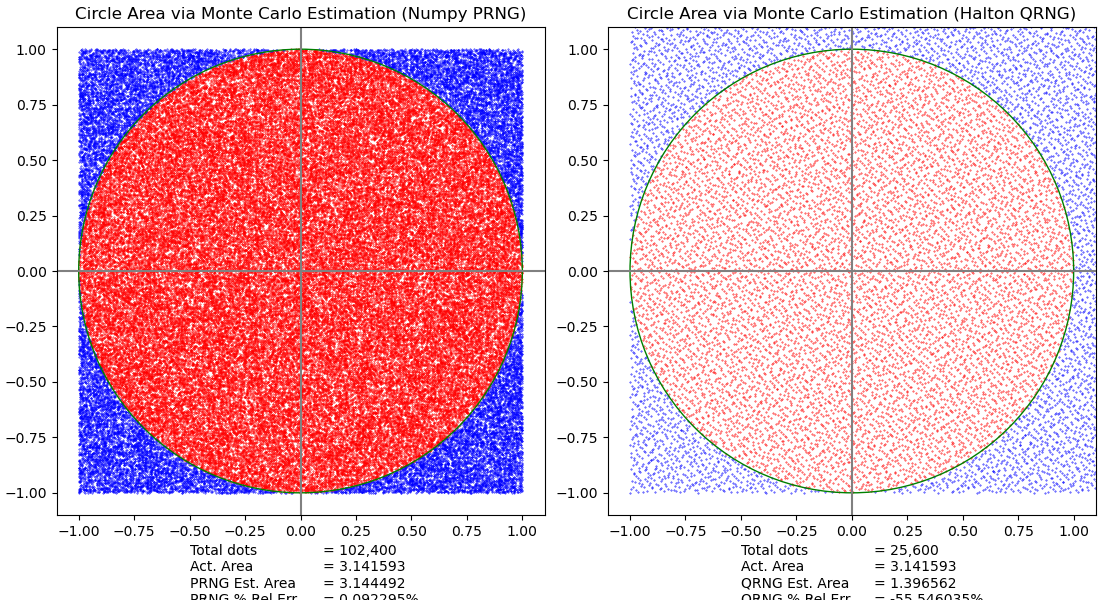

In [83]:
# mc_circle_qrng.ipynb

%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle
from numba import float64, int32, vectorize
from numpy.random import default_rng


def plot_prng(ax):
    iterations_sqrt = 320
    iterations = iterations_sqrt**2

    rng = default_rng(seed=2020)
    x = rng.random(iterations) * 2 - 1
    y = rng.random(iterations) * 2 - 1

    d = x**2 + y**2

    x_in = x[d <= 1.0]
    y_in = y[d <= 1.0]
    x_out = x[d > 1.0]
    y_out = y[d > 1.0]

    pixel_size = (72 / ax.figure.dpi) ** 2
    ax.scatter(x_in, y_in, color="red", marker=".", s=pixel_size)
    ax.scatter(x_out, y_out, color="blue", marker=".", s=pixel_size)

    ax.add_patch(Circle((0, 0), radius=1.0, color="green", fill=False))

    est_area = np.count_nonzero(d <= 1.0) / iterations * 4
    act_area = np.pi
    err = (est_area - act_area) / act_area

    ax.set_title("Circle Area via Monte Carlo Estimation (Numpy PRNG)")
    ax.set_xlim((-1.1, 1.1))
    ax.set_ylim((-1.1, 1.1))
    ax.axhline(0, color="gray")
    ax.axvline(0, color="gray")
    ax.set_aspect("equal")

    ax.text(
        -0.50,
        -1.5,
        "Total dots\nAct. Area\n" "PRNG Est. Area\nPRNG % Rel Err",
        ha="left",
    )

    ax.text(
        0.10,
        -1.5,
        f"= {iterations:,}\n= {act_area:.6f}\n" f"= {est_area:.6f}\n= {err:.6%}",
        ha="left",
    )


@vectorize([float64(float64, float64)], nopython=True)
def halton(n, p):
    h, f = 0, 1
    while n > 0:
        f = f / p
        h += (n % p) * f
        n = int(n / p)
    return h


def plot_qrng(ax):
    iterations_sqrt = 160
    iterations = iterations_sqrt**2

    primes = [2, 3]

    x = halton(np.arange(iterations), primes[0]) * 2 - 1
    
    y = halton(np.arange(iterations), primes[1]) * 2 - 1

    d = x**2 + y**2

    x_in = x[d <= 1.0]
    y_in = y[d <= 1.0]

    x_out = x[d > 1.0]
    y_out = y[d > 1.0]

    pixel_size = (72 / ax.figure.dpi) ** 2
    ax.scatter(x_in, y_in, color="red", marker=".", s=pixel_size)
    ax.scatter(x_out, y_out, color="blue", marker=".", s=pixel_size)

    ax.add_patch(Circle((0, 0), radius=1.0, color="green", fill=False))

    est_area = np.count_nonzero(d <= 1.0) / iterations * 4
    act_area = np.pi
    err = (est_area - act_area) / act_area

    ax.set_title("Circle Area via Monte Carlo Estimation (Halton QRNG)")
    ax.set_xlim((-1.1, 1.1))
    ax.set_ylim((-1.1, 1.1))
    ax.axhline(0, color="gray")
    ax.axvline(0, color="gray")
    ax.set_aspect("equal")

    ax.text(
        -0.50,
        -1.5,
        "Total dots\nAct. Area\n" "QRNG Est. Area\nQRNG % Rel Err",
        ha="left",
    )

    ax.text(
        0.10,
        -1.5,
        f"= {iterations:,}\n= {act_area:.6f}\n" f"= {est_area:.6f}\n= {err:.6%}",
        ha="left",
    )


def main():
    plt.close("all")
    fig = plt.figure(label=" ", constrained_layout=True)
    fig.set_size_inches(11, 6)
    gs = fig.add_gridspec(1, 2)

    ax = fig.add_subplot(gs[0, 0])
    plot_prng(ax)

    ax = fig.add_subplot(gs[0, 1])
    plot_qrng(ax)

    plt.show()


main()